In [1]:
import sys,os,copy
import numpy as np
sys.path.append(os.path.abspath('../smodels'))
sys.path.append(os.path.abspath('../protomodels'))
from builder.protomodel import ProtoModel
from builder.manipulator import Manipulator
from tester.predictor import Predictor
from walker.hiscore import Hiscore
from smodels.experiment.databaseObj import Database
from smodels.tools import runtime
runtime._experimental = True
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=2.0)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
def fromDict(inputDict):
    
    p = ProtoModel(walkerid=0)
    for key,v in inputDict.items():
        setattr(p,key,copy.deepcopy(v))
        
    return p

In [3]:
with open('../highestScores/real_run/real2.dict','r') as f:
    pList = eval(f.read())
pList = [fromDict(pDict) for pDict in pList[:]]
p = sorted(pList, key = lambda p: p.K, reverse=True)[0]
m = Manipulator(p)

In [4]:
#Check predictions:
pred = Predictor(walkerid=0,dbpath='../smodels-database/')

In [5]:
res = pred.predict(p)

[combine:0] selected predictions down via SRs from 130 to 15.
[combine:0] sorting out subsets, reduced 512 -> 42 combinations.


combination #42/42 100%|||||||||||||||||||||||||||||||||||||||||||Time: 0:00:04


[combine:0] selected predictions down via SRs from 130 to 15.
[combine:0] sorting out subsets, reduced 512 -> 42 combinations.


combination #42/42 100%|||||||||||||||||||||||||||||||||||||||||||Time: 0:00:04


In [6]:
print(p.K)

8.30509963723747


In [7]:
print(p.Z)

3.371858111281907


In [8]:
print(p)

ProtoModel (~chi10,~t1,~dL,~sL): K = 8.31, Z = 3.37


In [9]:
hi = Hiscore(walkerid=0,save_hiscores=False,predictor=pred)

In [10]:
hi.computeParticleContributions(m)
hi.computeAnalysisContributions(m)

[hiscore:0] computing contribution of ~t1 (1155.3): [1/3]


[combine:0] selected predictions down via SRs from 113 to 10.
[combine:0] sorting out subsets, reduced 109 -> 24 combinations.


combination #24/24 100%|||||||||||||||||||||||||||||||||||||||||||Time: 0:00:01


[hiscore:0] when removing ~t1, K changed: 8.305 -> 4.042 (-51.3%), Z: 3.372 -> 2.538 (100000 evts)
[hiscore:0] computing contribution of ~sL (912.3): [2/3]


[combine:0] selected predictions down via SRs from 120 to 15.
[combine:0] sorting out subsets, reduced 416 -> 48 combinations.


combination #48/48 100%|||||||||||||||||||||||||||||||||||||||||||Time: 0:00:03


[hiscore:0] when removing ~sL, K changed: 8.305 -> 7.756 (-6.6%), Z: 3.372 -> 3.183 (100000 evts)
[hiscore:0] computing contribution of ~dL (807.8): [3/3]


[combine:0] selected predictions down via SRs from 130 to 15.
[combine:0] sorting out subsets, reduced 512 -> 42 combinations.


combination #42/42 100%|||||||||||||||||||||||||||||||||||||||||||Time: 0:00:04


[hiscore:0] when removing ~dL, K changed: 8.305 -> 8.305 (0.0%), Z: 3.372 -> 3.372 (100000 evts)
[hiscore:0] stored 3 particle contributions
[hiscore:0] Now computing analysis contributions
[hiscore:0] Recompute the score. Old one at K=8.31, Z=3.37
[hiscore:0] without ATLAS-SUSY-2016-07(em) we get Z=2.596 (42%)
[hiscore:0] without ATLAS-SUSY-2016-16(em) we get Z=2.952 (23%)
[hiscore:0] without CMS-SUS-16-050(ul) we get Z=2.835 (29%)
[hiscore:0] without ATLAS-SUSY-2013-02(em) we get Z=3.371 (0%)
[hiscore:0] without CMS-SUS-13-012(ul) we get Z=3.282 (4%)
[hiscore:0] stored 5 analyses contributions


In [11]:
for tp in p.tpList:
    if tp[0] > 0.2:
        print(tp[0],tp[2],tp[2].expResult.datasets[0].dataInfo.dataType)
#         print(tp)
#         break

0.48570475206117636 ATLAS-SUSY-2015-06:1.30E+01 [TeV]:6.99E-03 [pb] (None, None) efficiencyMap
0.430621836946342 ATLAS-SUSY-2016-07:1.30E+01 [TeV]:1.31E-02 [pb] (None, None) upperLimit
0.27270004552227467 ATLAS-SUSY-2016-07:1.30E+01 [TeV]:2.04E-02 [pb] (None, None) upperLimit
0.4685553973010079 ATLAS-SUSY-2016-07:1.30E+01 [TeV]:2.27E-03 [pb] (None, None) efficiencyMap
0.5586677126991444 ATLAS-SUSY-2016-15:1.30E+01 [TeV]:2.64E-03 [pb] (None, None) upperLimit
0.36609876309586825 ATLAS-SUSY-2016-16:1.30E+01 [TeV]:2.64E-03 [pb] (None, None) upperLimit
0.3783530237540457 ATLAS-SUSY-2016-16:1.30E+01 [TeV]:1.05E-04 [pb] (-1000006, 1000006) efficiencyMap
0.43260440479909523 CMS-SUS-16-033:1.30E+01 [TeV]:2.64E-03 [pb] (None, None) upperLimit
1.0237674638883452 CMS-SUS-16-033:1.30E+01 [TeV]:1.31E-02 [pb] (None, None) upperLimit
1.0838412845236982 CMS-SUS-16-033:1.30E+01 [TeV]:2.04E-02 [pb] (None, None) upperLimit
0.6044852603803984 CMS-SUS-16-033:1.30E+01 [TeV]:2.48E-03 [pb] (None, None) efficie

In [12]:
print(tp[2].__dict__)

{'analysis': None, 'xsection': <smodels.theory.crossSection.XSection object at 0x7f6c919ef1f0>, 'conditions': None, 'mass': [[8.08E+02 [GeV], 3.00E+02 [GeV]], [8.08E+02 [GeV], 3.00E+02 [GeV]]], 'totalwidth': [[INF [GeV], 0.00E+00 [GeV]], [INF [GeV], 0.00E+00 [GeV]]], 'dataset': Dataset, 'txnames': [T2], 'elements': [[[[q]],[[q]]]], 'avgElement': averageElement, 'PIDs': [[[-1000001, -1000022], [1000001, 1000022]]], 'expResult': <smodels.experiment.expResultObj.ExpResult object at 0x7f6c91adf1f0>, 'expectedUL': None, 'upperLimit': 1.22E+01 [fb], 'likelihood': None, 'chi2': None}


In [13]:
for tp in p.bestCombo:
    print(tp)

ATLAS-SUSY-2016-07:1.30E+01 [TeV]:2.27E-03 [pb] (None, None)
ATLAS-SUSY-2016-16:1.30E+01 [TeV]:1.05E-04 [pb] (-1000006, 1000006)
CMS-SUS-16-050:1.30E+01 [TeV]:2.64E-03 [pb] (None, None)
ATLAS-SUSY-2013-02:8.00E+00 [TeV]:6.54E-06 [pb] (None, None)
CMS-SUS-13-012:8.00E+00 [TeV]:1.08E-03 [pb] (None, None)


### Fake likelihoods (only for illustration)

In [14]:
muvals = np.linspace(0.0,5.0,500)
llhdsBest = [[c.expResult.globalInfo.id,[c.getLikelihood(mu-3.0)/c.getLikelihood(0.0-3.0) for mu in muvals]] for c in p.bestCombo]
llhdsConst = [[tp[2].expResult.globalInfo.id,[tp[2].getLikelihood(mu-1.0)/tp[2].getLikelihood(0.0-1.0) for mu in muvals]] for tp in p.tpList if tp[2].expResult.datasets[0].dataInfo.dataType == 'efficiencyMap']
llhdsBest = dict(llhdsBest)
llhdsConst = dict(llhdsConst)

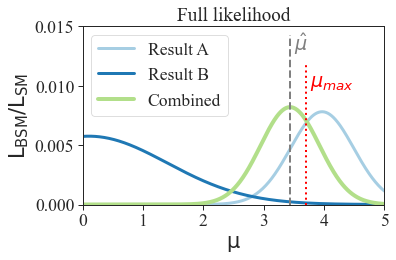

In [15]:
combined = None
mumax = 1.7+2.0
for key,val in llhdsBest.items():
#     if key != 'ATLAS-SUSY-2016-16' and key != 'CMS-SUS-16-050':
#         continue
    if key != 'CMS-SUS-16-050':
        continue 
    val = np.array(val)
    val = val/val.sum() #Normalize
    plt.plot(muvals,val,label='Result A',linewidth=3)
    if combined is None:
        combined = val[:]
    else:
        combined *= val
    
for key,val in llhdsConst.items():
    if key != 'ATLAS-SUSY-2015-06': continue
    val = np.array(val)
    val = val/val.sum() #Normalize    
    plt.plot(muvals,val,label='Result B',linewidth=3)    
    if combined is None:
        combined = val[:]
    else:
        combined *= val

combined = combined/combined.sum() #Normalize    
muhat = muvals[np.argmax(combined)]
plt.plot(muvals,combined,label='Combined',linewidth=4)
plt.axvline(x = mumax,ymax=0.8,c='red',linestyle='dotted',linewidth=2)
plt.axvline(x = muhat,ymax=0.95,c='gray',linestyle='--',linewidth=2)

plt.text(1.02*mumax,0.010,r'$\mu_{max}$',c='red')
plt.text(1.02*muhat,0.013,r'$\hat{\mu}$',c='gray')
plt.xlabel(r'$\mathrm{\mu}$', fontsize=21)
plt.ylabel(r'$\mathrm{L}_{\mathrm{BSM}}/\mathrm{L}_{\mathrm{SM}}$', fontsize=21)
# plt.yscale('log')
plt.legend()
plt.ylim(0.,0.015)
plt.xlim(0.,5.0)
plt.title('Full likelihood')
plt.tight_layout()
plt.savefig('full_llhd.pdf')
plt.show()


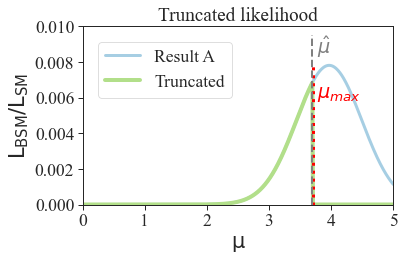

In [16]:
combined = None
mumax = 1.7+2.0
for key,val in llhdsBest.items():
#     if key != 'ATLAS-SUSY-2016-16' and key != 'CMS-SUS-16-050':
#         continue
    if key != 'CMS-SUS-16-050':
        continue
    val = np.array(val)
    val = val/val.sum() #Normalize
    plt.plot(muvals,val,label='Result A',linewidth=3)
    plt.plot(muvals,val,linewidth=3,alpha=0.0) #Just to fix the color
    if combined is None:
        combined = np.where(muvals < mumax,val,0.)
    else:
        combined *= val
        
plt.plot(muvals,combined,label='Truncated',linewidth=4)        

combined = combined/combined.sum() #Normalize    
muhat = muvals[np.argmax(combined)]
plt.axvline(x = mumax,ymax=0.8,c='red',linestyle='dotted',linewidth=3)
plt.axvline(x = muhat,ymax=0.95,c='gray',linestyle='--',linewidth=2)

plt.text(1.02*mumax,0.006,r'$\mu_{max}$',c='red')
plt.text(1.02*muhat,0.0085,r'$\hat{\mu}$',c='gray')
plt.xlabel(r'$\mathrm{\mu}$', fontsize=21)
plt.ylabel(r'$\mathrm{L}_{\mathrm{BSM}}/\mathrm{L}_{\mathrm{SM}}$', fontsize=21)
# plt.yscale('log')
plt.legend(loc=(0.05,0.6))
plt.ylim(0.,0.010)
plt.xlim(0.,5.0)
plt.title('Truncated likelihood')
plt.tight_layout()
plt.savefig('truncated_llhd.pdf')
plt.show()